In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"C:\Users\DCL\Data_Science\Final_Year_Project\Tomato_Data_Set"

In [3]:
CATEGORIES = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']

In [4]:
data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories)
    label = CATEGORIES.index(categories)
   # print(folder)
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        #print(img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(256,256))
        #print(img_arr)
        #plt.imshow(img_arr)
        #break
        data.append([img_arr,label])

In [5]:
data

[[array([[[166, 166, 172],
          [164, 164, 170],
          [168, 168, 174],
          ...,
          [106, 105, 115],
          [117, 116, 126],
          [128, 127, 137]],
  
         [[167, 167, 173],
          [162, 162, 168],
          [163, 163, 169],
          ...,
          [133, 132, 142],
          [146, 145, 155],
          [133, 132, 142]],
  
         [[172, 172, 178],
          [164, 164, 170],
          [162, 162, 168],
          ...,
          [110, 109, 119],
          [120, 119, 129],
          [137, 136, 146]],
  
         ...,
  
         [[158, 157, 167],
          [155, 154, 164],
          [157, 156, 166],
          ...,
          [100, 100, 112],
          [120, 120, 132],
          [ 95,  95, 107]],
  
         [[155, 154, 164],
          [150, 149, 159],
          [152, 151, 161],
          ...,
          [106, 106, 118],
          [114, 114, 126],
          [101, 101, 113]],
  
         [[157, 156, 166],
          [153, 152, 162],
          [159, 158, 168

In [6]:
random.shuffle(data) #mixup data

In [7]:
x = [] #image arry
y = [] #label

for features,label in data:
    x.append(features)
    y.append(label)

In [8]:
x = np.array(x) #convet x from list to array
y = np.array(y) #convert y from list to array

In [9]:
x

array([[[[124, 124, 138],
         [132, 132, 146],
         [111, 111, 125],
         ...,
         [170, 169, 179],
         [163, 162, 172],
         [156, 155, 165]],

        [[110, 110, 124],
         [118, 118, 132],
         [110, 110, 124],
         ...,
         [170, 169, 179],
         [168, 167, 177],
         [175, 174, 184]],

        [[123, 123, 137],
         [123, 123, 137],
         [115, 115, 129],
         ...,
         [167, 166, 176],
         [168, 167, 177],
         [185, 184, 194]],

        ...,

        [[130, 127, 142],
         [135, 132, 147],
         [112, 109, 124],
         ...,
         [184, 178, 189],
         [180, 174, 185],
         [177, 171, 182]],

        [[136, 133, 148],
         [133, 130, 145],
         [111, 108, 123],
         ...,
         [177, 171, 182],
         [176, 170, 181],
         [177, 171, 182]],

        [[137, 134, 149],
         [125, 122, 137],
         [105, 102, 117],
         ...,
         [179, 173, 184],
        

In [10]:
x = x/255

In [11]:
x

array([[[[0.48627451, 0.48627451, 0.54117647],
         [0.51764706, 0.51764706, 0.57254902],
         [0.43529412, 0.43529412, 0.49019608],
         ...,
         [0.66666667, 0.6627451 , 0.70196078],
         [0.63921569, 0.63529412, 0.6745098 ],
         [0.61176471, 0.60784314, 0.64705882]],

        [[0.43137255, 0.43137255, 0.48627451],
         [0.4627451 , 0.4627451 , 0.51764706],
         [0.43137255, 0.43137255, 0.48627451],
         ...,
         [0.66666667, 0.6627451 , 0.70196078],
         [0.65882353, 0.65490196, 0.69411765],
         [0.68627451, 0.68235294, 0.72156863]],

        [[0.48235294, 0.48235294, 0.5372549 ],
         [0.48235294, 0.48235294, 0.5372549 ],
         [0.45098039, 0.45098039, 0.50588235],
         ...,
         [0.65490196, 0.65098039, 0.69019608],
         [0.65882353, 0.65490196, 0.69411765],
         [0.7254902 , 0.72156863, 0.76078431]],

        ...,

        [[0.50980392, 0.49803922, 0.55686275],
         [0.52941176, 0.51764706, 0.57647059]

In [12]:
x.shape

(1359, 256, 256, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [16]:
history = model.fit(x,y,epochs=50,validation_split= .1)

Epoch 1/50
39/39 [==============================] - 108s 3s/step - loss: 1.2924 - accuracy: 0.7244 - val_loss: 1.3907 - val_accuracy: 0.6691
Epoch 2/50
39/39 [==============================] - 95s 2s/step - loss: 1.0977 - accuracy: 0.7433 - val_loss: 1.2981 - val_accuracy: 0.6691
Epoch 3/50
39/39 [==============================] - 67s 2s/step - loss: 1.0526 - accuracy: 0.7433 - val_loss: 1.2789 - val_accuracy: 0.6691
Epoch 4/50
39/39 [==============================] - 66s 2s/step - loss: 1.0102 - accuracy: 0.7433 - val_loss: 1.2344 - val_accuracy: 0.6912
Epoch 5/50
39/39 [==============================] - 69s 2s/step - loss: 0.9529 - accuracy: 0.7531 - val_loss: 1.0879 - val_accuracy: 0.6912
Epoch 6/50
39/39 [==============================] - 72s 2s/step - loss: 0.9424 - accuracy: 0.7645 - val_loss: 1.1174 - val_accuracy: 0.6912
Epoch 7/50
39/39 [==============================] - 72s 2s/step - loss: 0.8598 - accuracy: 0.7637 - val_loss: 1.0482 - val_accuracy: 0.6985
Epoch 8/50
39/39 [=

In [17]:
history

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

50

In [22]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2923942804336548,
 1.09769606590271,
 1.052573323249817,
 1.0101706981658936,
 0.952890157699585]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

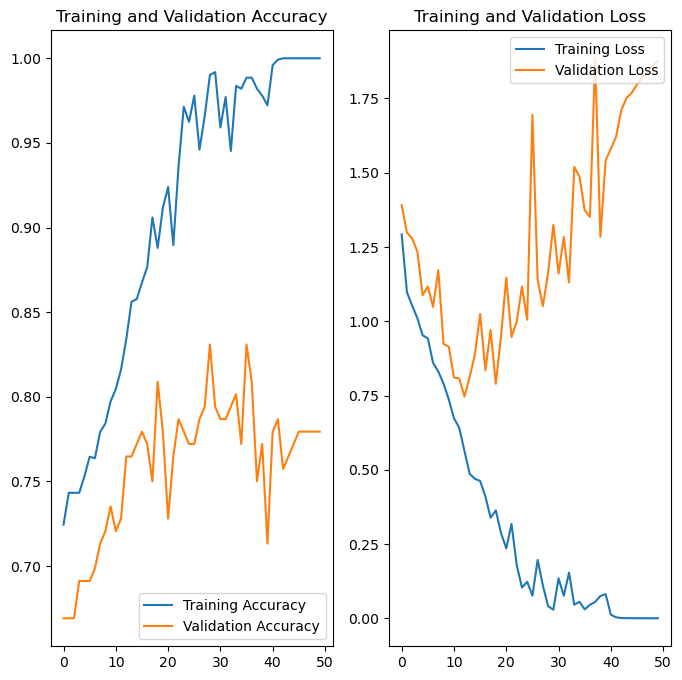

In [25]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()